# Ensemble Introduction

## Ensemble Description
- Ensemble is an **average** of forecast.
- Forecasting models have advantages and disadvantages.
- Seasonality, trend, regressors, short-term changes
- **Combining models is a solution to overcome flaws.**

### FB Prophet Pros and Cons
Pros:
- Flexible
- Built-in Cross-Validation
- Dynamics Events
- Great with regressors

Cons:
- Requires optimization
- Not good with short-term dynamics

### ARIMA, SARIMA, SARIMAX Pros and Cons
Pros:
- Easy Implementation
- Great results

Cons:
- Better with low amount of time periods or frequency
- Poor at dealing with non-linearity
- Does not handle complex seasonalities

### LinkedIn Silverkite Pros and Cons
Pros:
- Great Accuracy
- Parameter tuning does not take too long
- Seasonalities and fitting algorithms

Cons:
- Not beginner friendly
- Customization is complex

### RNN, LSTM Pros and Cons
Pros:
- Robust to outliers
- Simple to use
- Great with non-linearity

Cons: 
- Low insights
- Requires tuning (long time)
- Poor with dealing with trend

## Ensemble Mechanism

    Weight = [0.25 / (error/avg error)]/excess weight

# Libraries and data

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the predictions
df = pd.concat(map(pd.read_csv, ['predictions_prophet.csv',
                                 'predictions_sarimax.csv',
                                 'predictions_silverkite.csv',
                                 'predictions_lstm.csv']),
               axis = 1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,Date,silverkite,Date,lstm
0,2021-01-01,724.460105,2021-01-01,723.397197,2192,2021-01-01,749.870698,2021-01-01,754.135212
1,2021-01-02,836.084086,2021-01-02,809.390392,2193,2021-01-02,834.345095,2021-01-02,898.053968
2,2021-01-03,754.505683,2021-01-03,740.226097,2194,2021-01-03,751.784844,2021-01-03,783.025162
3,2021-01-04,880.816533,2021-01-04,871.244540,2195,2021-01-04,898.242799,2021-01-04,942.911663
4,2021-01-05,750.764799,2021-01-05,740.563972,2196,2021-01-05,778.078463,2021-01-05,789.413242


In [3]:
#Fetch what we need
df = df[["ds", "prophet", "sarimax", "silverkite", "lstm"]]
df.head(2)

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,724.460105,723.397197,749.870698,754.135212
1,2021-01-02,836.084086,809.390392,834.345095,898.053968


In [4]:
#index 
df.index = df.pop('ds')
df.head(1)

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,724.460105,723.397197,749.870698,754.135212


# Ensemble

## error

In [9]:
#getting the error
error_prophet = float(pd.read_csv("best_params_prophet.csv").iloc[4,1])
error_sarimax = pd.read_csv("best_params_sarimax.csv").iloc[6,1]
error_silverkite = float(pd.read_csv("best_params_silverkite.csv").iloc[0,1])
error_lstm = pd.read_csv("best_params_lstm.csv").iloc[7,1]
mylist = [error_prophet, error_sarimax, error_silverkite, error_lstm]
mylist

[48.12272129045956, 58.89139659620643, 47.8, 83.37032719759705]

## avg error

In [10]:
#average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm)/4
print(f"The average error is {average_error}")

The average error is 59.54611127106576


## weights

In [11]:
#Initial Weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The SARIMAX weight is {weight_sarimax}")

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")

The Prophet weight is 0.3093450955924583
The SARIMAX weight is 0.2527793307371722
The Silverkite weight is 0.3114336363549465
The LSTM weight is 0.17855906673466324


## extra weight

In [12]:
#Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding the weights equals to {extra_weight}")

Adding the weights equals to 1.0521171294192402


# Ensemble Forecast

In [13]:
#Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.sarimax * weight_sarimax + df.silverkite * weight_silverkite + df.lstm * weight_lstm) / extra_weight

<AxesSubplot:xlabel='ds'>

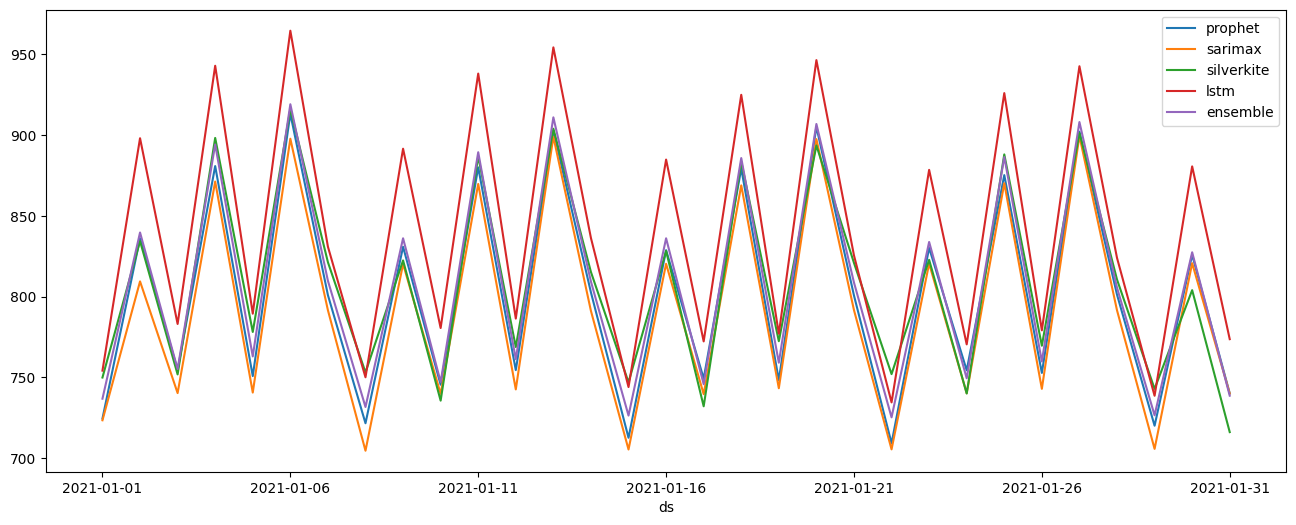

In [14]:
#Visualization
df.plot(figsize = (16,6), legend = True)